In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt

### Import data sets

- Body Performance Data(https://bit.ly/3FBtYWu) 
- Heart Failure Prediction Dataset(https://bit.ly/3TR0yYU) 
- Telco Customer Churn(https://bit.ly/3fqDwc7) 
- Used Car Data(https://bit.ly/3sLi4lj) 
- Electric Motor Temperature(https://bit.ly/3UuvaPV)

In [3]:
# import body_perfomance
df_perform = pd.read_csv("body_perfomance.csv")

# import measures_v2
df_measures = pd.read_csv("measures_v2.csv")

In [4]:
def string_to_number(x): # one hot enconding
    if x == 'M':
        return 1
    if x == 'F':
        return 0
        
df_perform['gender'] = df_perform['gender'].map(string_to_number)    

In [5]:
print(df_perform['class'].unique())

['C' 'A' 'B' 'D']


In [6]:
def string_to_number(x): # one hot enconding
    if x == 'A':
        return 0
    if x == 'B':
        return 1
    if x == 'C':
        return 2
    if x == 'D':
        return 3
        
df_perform['class'] = df_perform['class'].map(string_to_number)    

In [7]:
df_perform

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


In [8]:
df_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int64  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


In [9]:
df_measures

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


### Train a linear regression model on the regression Data Set and make a bar plot using the weights of the linear model. Interpret the plot.

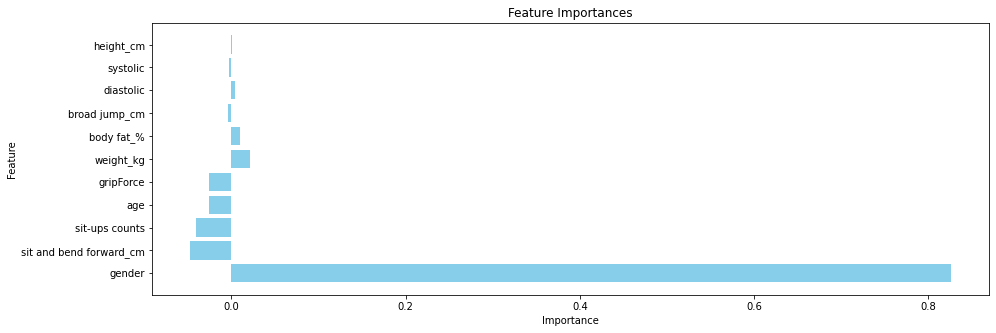

In [10]:
# Assuming df_measures is your DataFrame and 'target' is your target variable
X = df_perform.drop('class', axis=1)
y = df_perform['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.coef_

# Create a DataFrame for easier manipulation
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by absolute value of Importance
features['abs_importance'] = features['Importance'].apply(abs)
features = features.sort_values('abs_importance', ascending=False).drop('abs_importance', axis=1)

# Plot the feature importances
plt.figure(figsize=(15,5))
plt.barh(y=features['Feature'], width=features['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

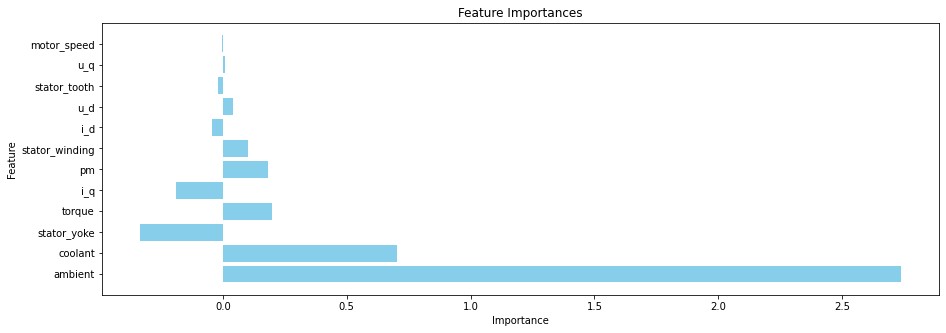

In [11]:
# Assuming df_measures is your DataFrame and 'target' is your target variable
X = df_measures.drop('profile_id', axis=1)
y = df_measures['profile_id']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.coef_

# Create a DataFrame for easier manipulation
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by absolute value of Importance
features['abs_importance'] = features['Importance'].apply(abs)
features = features.sort_values('abs_importance', ascending=False).drop('abs_importance', axis=1)

# Plot the feature importances
plt.figure(figsize=(15,5))
plt.barh(y=features['Feature'], width=features['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Generate the classification Data. Set the image showing the decision tree

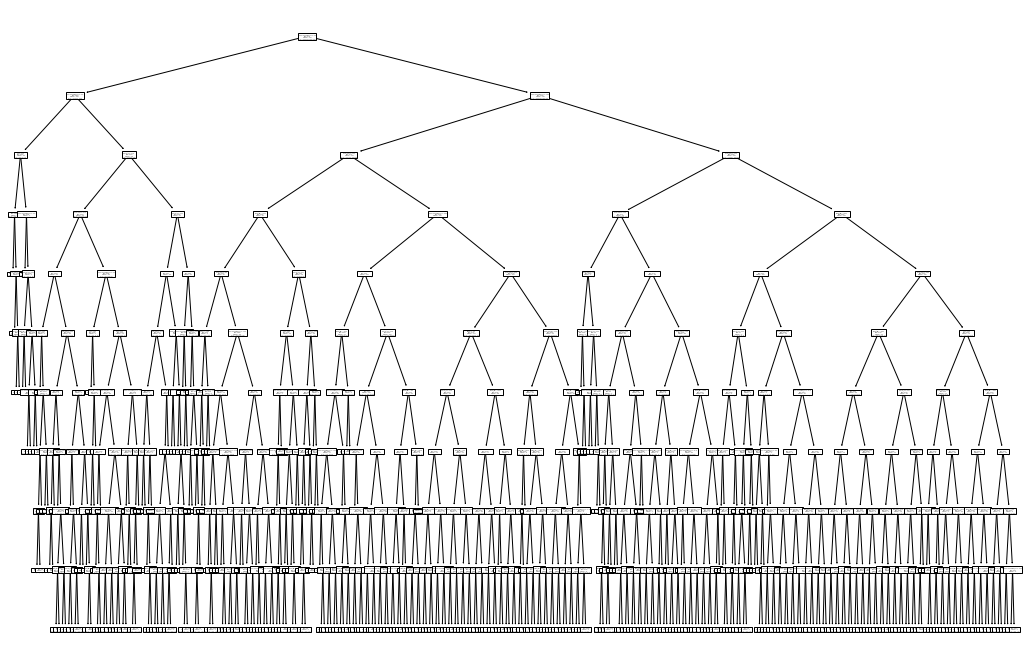

In [12]:
# Suppose 'target' is your target column
target = 'class'

# Select features by excluding the target
features = df_perform.columns.drop(target)

# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df_perform[features], df_perform[target], test_size=0.3, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=10)

# Train the classifier
clf.fit(X_train, y_train)

# Now let's visualize the tree
fig, ax = plt.subplots(figsize=(18, 12)) 
tree.plot_tree(clf, feature_names=features, ax=ax)
plt.show()

In [12]:
!pip install dtreeviz

In [13]:
from dtreeviz.dtreeviz 

from dtreeviz.trees import * 
from dtreeviz.trees import dtreeviz


# load dataset
X = df_perform.drop('class', axis=1)
y = df_perform['class']

#Creating the tree visualization. 
viz = dtreeviz(model, 
               x_data = X, 
               y_data = y, 
               target_name = 'class', 
               feature_names = df_perform.feature_names, 
               class_names = list(df_perform.target_names), 
               title = "DecisionTree-Perform")
# salvare SVG - run SVG

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (C:\Python310\lib\site-packages\dtreeviz\trees.py)

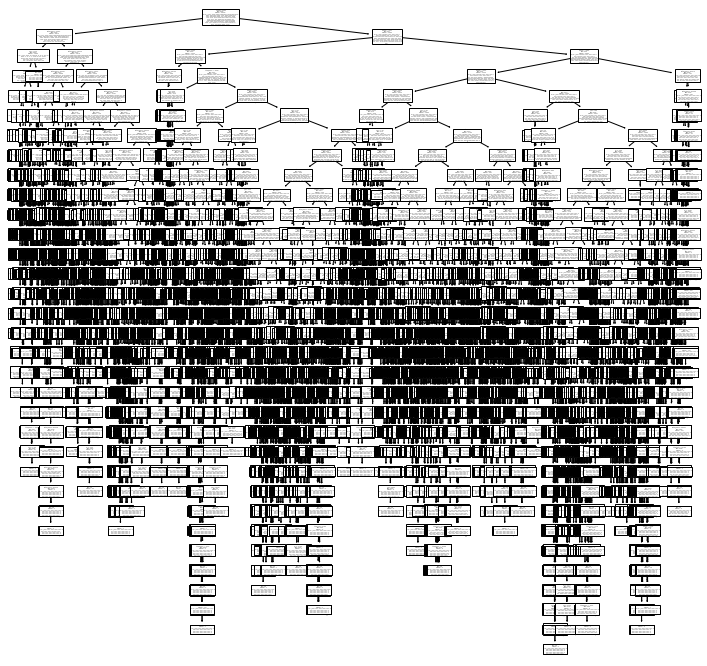

In [13]:
# Suppose 'target' is your target column
target = 'profile_id'

# Select features by excluding the target
features = df_measures.columns.drop(target)

# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df_measures[features], df_measures[target], test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier() # max_depth=10

# Train the classifier
clf.fit(X_train, y_train)

# Now let's visualize the tree
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust size as per your need
tree.plot_tree(clf, feature_names=features, ax=ax)
plt.show()

### For both Data sets, after it was cleaned, split them into the train and test subsets

In [14]:
# For the first dataframe
X1 = df_perform.drop('class', axis=1)
y1 = df_perform['class']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# For the second dataframe
X2 = df_measures.drop('profile_id', axis=1)
y2 = df_measures['profile_id']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

### On the train subsets of the regression Data Set to train the following alogorithms: Linear Regression and KNN Regression (bonus: try RandomForestClassification, DecisionTreeClassification, Bernouli Naive Bayes, and Multinominal Naive Bayse)

### For each regression model, get the MSE, MAE and RWSE on the test subset

In [15]:
# import the librari for model
from sklearn.linear_model import LinearRegression

# Linear Regression for df_perform
lr = LinearRegression()
lr.fit(X1_train, y1_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions for df_perform
y1_pred = lr.predict(X1_test)

# Calculate MSE, MAE, and RMSE for df_perform
mse1 = mean_squared_error(y1_test, y1_pred)
mae1 = mean_absolute_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)

print("df_perform Metrics:")
print("Mean Squared Error (MSE):", mse1)
print("Mean Absolute Error (MAE):", mae1)
print("Root Mean Squared Error (RMSE):", rmse1)

df_perform Metrics:
Mean Squared Error (MSE): 0.5192532023989974
Mean Absolute Error (MAE): 0.5775439948489344
Root Mean Squared Error (RMSE): 0.7205922580759506


In [17]:
# Linear Regression for df_measures
lr = LinearRegression()
lr.fit(X2_train, y2_train)

LinearRegression()

In [18]:
# Predictions for df_measures
y2_pred = lr.predict(X2_test)

# Calculate MSE, MAE, and RMSE for df_measures
mse2 = mean_squared_error(y2_test, y2_pred)
mae2 = mean_absolute_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)

print("\ndf_measures Metrics:")
print("Mean Squared Error (MSE):", mse2)
print("Mean Absolute Error (MAE):", mae2)
print("Root Mean Squared Error (RMSE):", rmse2)


df_measures Metrics:
Mean Squared Error (MSE): 321.3643851600555
Mean Absolute Error (MAE): 14.723631189803902
Root Mean Squared Error (RMSE): 17.926638981137973


### For each regression model, build the following table: MSE, MAE, RMSE.

In [19]:
# Create a table of the following structure as a pandas data frame.
# define the data for the table
data = {
    'error model': ['MSE', 'MAE', 'RMSE'],
    'df_perform': [mse1, mae1, rmse1],
    'df_measures': [mse2, mae2, rmse2],
    
}

# create the DataFrame
log_new_df = pd.DataFrame(data)

# display the DataFrame
print(log_new_df)


  error model  df_perform  df_measures
0         MSE    0.519253   321.364385
1         MAE    0.577544    14.723631
2        RMSE    0.720592    17.926639


### Analyze the tables you got, make some conculusion, and choose the best regression and classification, models.

Tabelul reprezintă eroarea medie pătratică (MSE), eroarea medie absolută (MAE) și eroarea medie pătratică (RMSE) pentru modelele de regresie construite pe seturile de date „df_perform” și „df_measures”.

Pentru setul de date „df_perform”, toate măsurile de eroare (MSE, MAE și RMSE) sunt relativ mici, ceea ce indică faptul că modelele oferă o potrivire decentă la date. Diferențele dintre valorile reale și cele prognozate sunt relativ mici în medie.

Cu toate acestea, pentru setul de date „df_measures”, valorile de eroare sunt semnificativ mai mari. Acest lucru sugerează că modelele nu se potrivesc de asemenea cu aceste date, iar discrepanțele dintre valorile reale și cele prognozate sunt în medie mai mari.

### On the train subsets of the regression Data Set to train the following alogorithms: Linear Regression and KNN Regression (bonus: try RandomForestClassification, DecisionTreeClassification, Bernouli Naive Bayes, and Multinominal Naive Bayse)

### For each classification model, get the Accuracy, Precision, Recall and F1-score

In [20]:
# import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Assuming target variables are categorical and they are strings, we have to encode them into numbers
le1 = LabelEncoder()
y1_train = le1.fit_transform(y1_train)
y1_test = le1.transform(y1_test)

le2 = LabelEncoder()
y2_train = le2.fit_transform(y2_train)
y2_test = le2.transform(y2_test)

# KNN Classification for df_perform
knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)
y1_pred = knn.predict(X1_test)

# Print out the metrics for df_perform
print("Accuracy for df_perform: ", accuracy_score(y1_test, y1_pred))
print("Precision for df_perform: ", precision_score(y1_test, y1_pred, average='macro'))
print("Recall for df_perform: ", recall_score(y1_test, y1_pred, average='macro'))
print("F1-score for df_perform: ", f1_score(y1_test, y1_pred, average='macro'))

# KNN Classification for df_measures
knn = KNeighborsClassifier()
knn.fit(X2_train, y2_train)
y2_pred = knn.predict(X2_test)

# Print out the metrics for df_measures
print("Accuracy for df_measures: ", accuracy_score(y2_test, y2_pred))
print("Precision for df_measures: ", precision_score(y2_test, y2_pred, average='macro'))
print("Recall for df_measures: ", recall_score(y2_test, y2_pred, average='macro'))
print("F1-score for df_measures: ", f1_score(y2_test, y2_pred, average='macro'))


Accuracy for df_perform:  0.5574912891986062
Precision for df_perform:  0.5825819395144783
Recall for df_perform:  0.5528996271396757
F1-score for df_perform:  0.5573034101316096
Accuracy for df_measures:  0.8297762025823743
Precision for df_measures:  0.7934405021808127
Recall for df_measures:  0.7896762488317933
F1-score for df_measures:  0.7869067913588468


In [21]:
# first's model metrics
accuracy_one = accuracy_score(y1_test, y1_pred)
precision_score_one = precision_score(y1_test, y1_pred, average='macro')
recall_score_one = recall_score(y1_test, y1_pred, average='macro')
f1_score_one = f1_score(y1_test, y1_pred, average='macro')

# second's model metrics
accuracy_two = accuracy_score(y2_test, y2_pred)
precision_score_two = precision_score(y2_test, y2_pred, average='macro')
recall_score_two = recall_score(y2_test, y2_pred, average='macro')
f1_score_two = f1_score(y2_test, y2_pred, average='macro')

# Create a table of the following structure as a pandas data frame.
# define the data for the table
data = {
    'error model': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'df_perform': [accuracy_one, precision_score_one, recall_score_one, f1_score_one],
    'df_measures': [accuracy_two, precision_score_two, recall_score_two, f1_score_two],
    
}

# create the DataFrame
knn_new_df = pd.DataFrame(data)

# display the DataFrame
print(knn_new_df)


  error model  df_perform  df_measures
0    Accuracy    0.557491     0.829776
1   Precision    0.582582     0.793441
2      Recall    0.552900     0.789676
3    F1-score    0.557303     0.786907


### Analyze the tables you got, make some conculusion, and choose the best regression and classification, models.

Tabelul include valori pentru evaluarea performanței unui model de clasificare binar, în special acuratețe, precizie, reamintire și scor F1. Fiecare măsurătoare oferă o perspectivă diferită asupra performanței modelului:

Pentru setul de date „df_perform”:

Acuratețea, Precizia, Recall și scorul F1 sunt în jur de 0.55 - 0.58, ceea ce sugerează că performanța modelului este moderată. Precizia relativ scăzută și recall indică faptul că modelul poate clasifica greșit un număr semnificativ de cazuri.

Pentru setul de date „df_measures”:

Toate valorile sunt considerabil mai mari, în jur de 0.79 - 0.83, ceea ce indică faptul că modelul a funcționat mai bine pe acest set de date. Modelul are o rată mai mare de a prezice corect clasa pozitivă (Precizie), de a captura cazuri pozitive reale (Recall) și de a menține un echilibru între cele două (scor F1).

### Pick the best classificaation model and interpret the using shap.
Create the following plots:
- SHAP barplot;
- SHAP waterfall plot;
- SHAP beeswarm plot;
- SHAP force plot;

In [24]:
!pip install shap

     ------------------------------------ 435.6/435.6 kB 938.9 kB/s eta 0:00:00
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)


In [ ]:
import shap

# KNN Classification for df_perform
knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)

# Use KernelExplainer for models other than tree-based
explainer = shap.KernelExplainer(knn.predict, X1_train)

# Compute SHAP values
# shap_values = explainer.shap_values(X1_test)
shap_values = explainer.shap_values(X1_test, silent=True)

# SHAP barplot
shap.summary_plot(shap_values, X1_test, plot_type="bar")

# SHAP beeswarm plot
shap.summary_plot(shap_values, X1_test)

# SHAP waterfall plot
# The waterfall plot is typically used for single predictions, so we will just take the first one
shap.waterfall_plot(explainer.expected_value, shap_values[0], X1_test.iloc[0])

# SHAP force plot
shap.force_plot(explainer.expected_value, shap_values[0], X1_test.iloc[0])


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
Using 9375 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X doe

In [25]:
import shap

# KNN Classification for df_perform
knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)
y1_pred = knn.predict(X1_test)

# Use KernelExplainer for models other than tree-based
# explainer = shap.KernelExplainer(knn.predict, X1_train)
explainer = shap.KernelExplainer(y1_pred, X1_train)

# Compute SHAP values
shap_values = explainer.shap_values(X1_test)

# SHAP barplot
shap.summary_plot(shap_values, X1_test, plot_type="bar")

# SHAP beeswarm plot
shap.summary_plot(shap_values, X1_test)

# SHAP waterfall plot
# The waterfall plot is typically used for single predictions, so we will just take the first one
shap.waterfall_plot(explainer.expected_value, shap_values[0], X1_test.iloc[0])

# SHAP force plot
shap.force_plot(explainer.expected_value, shap_values[0], X1_test.iloc[0])


Provided model function fails when applied to the provided data set.


TypeError: 'numpy.ndarray' object is not callable

In [23]:
import shap

# KNN Classification for df_measures
knn = KNeighborsClassifier()
knn.fit(X2_train, y2_train)
y2_pred = knn.predict(X2_test)

# Create KNN Regressor model and fit data
# knn = KNeighborsRegressor()
# knn.fit(X1_train, y1_train)

# Use KernelExplainer for models other than tree-based
# explainer = shap.KernelExplainer(knn.predict, X1_train)
explainer = shap.KernelExplainer(y2_pred, X2_train)

# Compute SHAP values
shap_values = explainer.shap_values(X2_test)

# SHAP barplot
shap.summary_plot(shap_values, X2_test, plot_type="bar")

# SHAP beeswarm plot
shap.summary_plot(shap_values, X2_test)

# SHAP waterfall plot
# The waterfall plot is typically used for single predictions, so we will just take the first one
shap.waterfall_plot(explainer.expected_value, shap_values[0], X2_test.iloc[0])

# SHAP force plot
shap.force_plot(explainer.expected_value, shap_values[0], X2_test.iloc[0])


ModuleNotFoundError: No module named 'shap'

### Make some conclusion on each plot

### Pick the best regression model and interpret it using LIME. Find the samples with the highest difference between the target and predicted values. Interpret them with LIME and say what went wrong.

### Make some conclusion on each plot.